# Demo usage of the information from the TMVA interface fitting  TPC QA variables
* Load TMVA interface function
* Load tree and defining derived information (TTree aliases) and metadata
* CacheTree input variables to tree format usable by TMVA
* Register example methods used for regression
* Emulation of the bootstrap - training repeated several time
* Load array of regression -used later in the array regression evaluation (mean, median, rms)
* Example draw queries

In [1]:
%jsroot OFF

In [2]:
gSystem->AddIncludePath("-I$ALICE_ROOT/include/"); //couldn't add include path in .rootr
AliDrawStyle::SetDefaults();
AliDrawStyle::ApplyStyle("figTemplate");
TCanvas *canvasDraw = new TCanvas("canvasDraw","canvasDraw",900,700);
TTree *treeCache=0,*tree=0;

Info in <AliDrawStyle::ApplyStyle>: figTemplate


### Load TMVA interface function

In [3]:
.L $AliRoot_SRC/STAT/Macros/AliNDFunctionInterface.cxx+

### Load tree and defining derived  information (TTree aliases)  and metadata

In [4]:
AliExternalInfo info;
tree = info.GetChain("QA.TPC", "LHC17*", "cpass1_pass1", "QA.EVS;QA.rawTPC");
tree->SetAlias("interactionRate", "QA.EVS.interactionRate");
///
tree->SetAlias("qmaxQASum", "Sum$(qmaxQA.fElements*((abs(qmaxQA.fElements-40)<20)))/Sum$((abs(qmaxQA.fElements-40)<20))");
tree->SetAlias("qmaxQASumIn", "Sum$(qmaxQA.fElements*((Iteration$<36&&abs(qmaxQA.fElements-40)<20)))/Sum$((Iteration$<36&&abs(qmaxQA.fElements-40)<20))");
tree->SetAlias("qmaxQASumOut", "Sum$(qmaxQA.fElements*((Iteration$>=36&&abs(qmaxQA.fElements-40)<20)))/Sum$((Iteration$>=36&&abs(qmaxQA.fElements-40)<20))");
tree->SetAlias("qmaxQASumR", "qmaxQASumIn/qmaxQASum");
tree->SetAlias("meanMIPeleR", "meanMIPele/meanMIP");
tree->SetAlias("bz0", "bz+rndm*0.0001");
tree->SetMarkerStyle(21); tree->SetMarkerSize(0.5);

Info in <AliExternalInfo::ReadConfig>: Path: $ALICE_ROOT/STAT/Macros/AliExternalInfo.cfg	/data/alicesw6/sw/ubuntu1604_x86-64/AliRoot/0_ROOT6-1/STAT/Macros/AliExternalInfo.cfg
Info in <AliExternalInfo::SetupVariables>: Information will be stored/retrieved in/from /homeold/miranov/AliExternalInfoCache//data/2017/LHC17*/cpass1_pass1/
Info in <AliExternalInfo::GetChain>: Files to add to chain: /homeold/miranov/AliExternalInfoCache//data/2017/LHC17c/cpass1_pass1/TPC_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17e/cpass1_pass1/TPC_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17f/cpass1_pass1/TPC_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17g/cpass1_pass1/TPC_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17h/cpass1_pass1/TPC_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17i/cpass1_pass1/TPC_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17j/cpass1_pass1/TPC_trending.roo

Collection name='metaTable', class='THashList', size=1490
 OBJ: TNamed	DCAr_Status.html	%d<run>/dca_and_phi.png
 OBJ: TNamed	DCAz_Status.html	%d<run>/dca_and_phi.png
 OBJ: TNamed	MIPattachSlopeA.AxisTitle	 dEdx(MIP/50) Attach
 OBJ: TNamed	MIPattachSlopeA.Description	TPC standard QA variables.  Class TPC dEdx Attach ASide
 OBJ: TNamed	MIPattachSlopeA.Legend	 dEdx Attach A side
 OBJ: TNamed	MIPattachSlopeA.Title	 dEdx Attach A side
 OBJ: TNamed	MIPattachSlopeA.class	TPC dEdx Attach ASide
 OBJ: TNamed	MIPattachSlopeC.AxisTitle	 dEdx(MIP/50) Attach
 OBJ: TNamed	MIPattachSlopeC.Description	TPC standard QA variables.  Class TPC dEdx Attach CSide
 OBJ: TNamed	MIPattachSlopeC.Legend	 dEdx Attach C side
 OBJ: TNamed	MIPattachSlopeC.Title	 dEdx Attach C side
 OBJ: TNamed	MIPattachSlopeC.class	TPC dEdx Attach CSide
 OBJ: TNamed	PID_Status.html	%d<run>/TPC_dEdx_track_info.png
 OBJ: TNamed	TPC_Occ_IROC..AxisTitle	 Occupancy
 OBJ: TNamed	TPC_Occ_IROC..Description	TPC standard QA variables.  Class TP

Info in <qatpcAddMetadata>: Start processing Tree tpcQA
Info in <qatpcAddMetadata>: End
Info in <AliExternalInfo::SetupVariables>: Information will be stored/retrieved in/from /homeold/miranov/AliExternalInfoCache//data/2017/LHC17*/cpass1_pass1/
Info in <AliExternalInfo::GetChain>: Files to add to chain: /homeold/miranov/AliExternalInfoCache//data/2017/LHC17c/cpass1_pass1/EVS_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17d/cpass1_pass1/EVS_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17e/cpass1_pass1/EVS_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17f/cpass1_pass1/EVS_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17g/cpass1_pass1/EVS_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17h/cpass1_pass1/EVS_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17i/cpass1_pass1/EVS_trending.root
/homeold/miranov/AliExternalInfoCache//data/2017/LHC17j/cpass1_pass1/EVS_trending.roo

## CacheTree input variables to tree format usable by TMVA
-------------------------------
* TMVA can not work with friend trees with indeces, respec. with array of the measurements, resp aliases and functions
  * input "flat tree" for MVA learning to be created with variables of interest
  * AliTreePlayer::MakeCacheTree to create flat input tree for TMVA
  ````
  AliTreePlayer::MakeCacheTree(tree,"resolutionMIP:meanMIPeleR:tpcItsMatchA:bz0:interactionRate:qmaxQASum:qmaxQASumIn:qmaxQASumOut:qmaxQASumR:run:time","TMVAInput.root","MVAInput","meanMIP>30&&run==QA.EVS.run");
````

In [5]:
AliTreePlayer::MakeCacheTree(tree,"resolutionMIP:meanMIPeleR:tpcItsMatchA:bz0:interactionRate:qmaxQASum:qmaxQASumIn:qmaxQASumOut:qmaxQASumR:run:time","TMVAInput.root","MVAInput","meanMIP>30&&run==QA.EVS.run");

### Register example methods used for regression
----------------------------------------
* BDT and MLP example
* DNN - for the moment not used as need BLASS library  - not in default AliRoot
   * Naive adaptation of the DNN configuration from the ROOT tutorials  TMVARegression.C -
   * slow 100 times smaller than MLP
   * lead to floating point exception
   

In [6]:
TString layoutString("Layout=TANH|20,LINEAR");
  TString training0("LearningRate=1e-5,Momentum=0.5,Repetitions=1,ConvergenceSteps=500,BatchSize=50,"
                    "TestRepetitions=7,WeightDecay=0.01,Regularization=L1,DropConfig=0.5+0.5+0.5+0.5,"
                    "DropRepetitions=2");
  TString training1("LearningRate=1e-5,Momentum=0.9,Repetitions=1,ConvergenceSteps=170,BatchSize=30,"
                    "TestRepetitions=7,WeightDecay=0.01,Regularization=L1,DropConfig=0.1+0.1+0.1,DropRepetitions="
                    "1");
  TString trainingStrategyString("TrainingStrategy=");
  trainingStrategyString += training0 + "|" + training1;
  TString dnnOptions("!H:V:ErrorStrategy=SUMOFSQUARES:VarTransform=G:WeightInitialization=XAVIERUNIFORM:Architecture=CPU");
  dnnOptions.Append(":");
  dnnOptions.Append(layoutString);
  dnnOptions.Append(":");
  dnnOptions.Append(trainingStrategyString);
  ///
  AliNDFunctionInterface::registerMethod("BDTRF25_8","!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8",TMVA::Types::kBDT);
  AliNDFunctionInterface::registerMethod("BDTRF12_16", "!H:!V:NTrees=12:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=16", TMVA::Types::kBDT);
  AliNDFunctionInterface::registerMethod("KNN","nkNN=20:ScaleFrac=0.8:SigmaFact=1.0:Kernel=Gaus:UseKernel=F:UseWeight=T:!Trim", TMVA::Types::kKNN);
  AliNDFunctionInterface::registerMethod("MLP", "!H:!V:VarTransform=Norm:NeuronType=tanh:NCycles=20000:HiddenLayers=N+20:TestRate=6:TrainingMethod=BFGS:Sampling=0.3:SamplingEpoch=0.8:ConvergenceImprove=1e-6:ConvergenceTests=15:!UseRegulator",TMVA::Types::kMLP);
  AliNDFunctionInterface::registerMethod("DNN_CPU",dnnOptions.Data(), TMVA::Types::kDNN);

### Emulation of the bootstrap - training repeated several time
* TODO - Implement real bootstrap ( random sampling with replacement + other methods) in the TMVA (to check with ROOT)
* TODO - DNN example - TO USE DNN (Deep neural network)  BLASS or CBLASS library has to be enabled in ROOT. This is not the case for the default aliBuild recipies

In [7]:
Int_t nRegression=10;
TFile *f= TFile::Open("TMVAInput.root");
f->GetObject("MVAInput",treeCache);
gSystem->Unlink("TMVA_RegressionOutput.root");
TString output="TMVA_RegressionOutput.root#";
for (Int_t iBoot=0; iBoot<nRegression; iBoot++) {
    AliNDFunctionInterface::FitMVARegression(output+"resolutionMIP"+iBoot,treeCache, "resolutionMIP", "interactionRate>0", "interactionRate:bz0:qmaxQASum:qmaxQASumR", "BDTRF25_8:BDTRF12_16:KNN", "");
    AliNDFunctionInterface::FitMVARegression(output+"meanMIPeleR"+iBoot,treeCache, "meanMIPeleR", "interactionRate>0", "interactionRate:bz0:qmaxQASum:qmaxQASumR", "BDTRF25_8:BDTRF12_16:KNN","");
    AliNDFunctionInterface::FitMVARegression(output+"tpcItsMatchA"+iBoot,treeCache, "tpcItsMatchA", "interactionRate>0", "interactionRate:bz0:qmaxQASum:qmaxQASumR", "BDTRF25_8:BDTRF12_16:KNN","");
}


DataSetInfo              : [resolutionMIP0] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[resolutionMIP0] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [resolutionMIP0] : Number of events in input trees
                         : Dataset[resolutionMIP0] :     Regression requirement: "interactionRate>0"
                         : Dataset[resolutionMIP0] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[resolutionMIP0] :     Regression      -- efficiency             : 0.99765
                         : Dataset[resolutionMIP0] :  you have opted for interpreting the requested number of training/testing events
                         :  to

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0535 sec         
                         : Dataset[resolutionMIP0] : Create results for training
                         : Dataset[resolutionMIP0] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[resolutionMIP0] : Elapsed time for evaluation of 424 events: 0.00272 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP0/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP0/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                 

92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, ti

                         : TMVA_RegressionOutput.root:/resolutionMIP0/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.000822 sec         
                         : Dataset[resolutionMIP0] : Create results for training
                         : Dataset[resolutionMIP0] : Eval

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec


                         : Dataset[resolutionMIP0] : Elapsed time for evaluation of 424 events: 0.00292 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[resolutionMIP0] : Create results for testing
                         : Dataset[resolutionMIP0] : Evaluation of BDTRF12_16 on testing sample
                         : Dataset[resolutionMIP0] : Elapsed time for evaluation of 424 events: 0.00155 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: KN

44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, ti

                         : Elapsed time for evaluation of 424 events: 0.0055 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00508 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97

60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR0] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR0] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR0] : Number of events in input trees
                         : Dataset[meanMIPeleR0] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR0] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR0] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR0] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0607 sec         
                         : Dataset[meanMIPeleR0] : Create results for training
                         : Dataset[meanMIPeleR0] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[meanMIPeleR0] : Elapsed time for evaluation of 424 events: 0.00274 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR0/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR0/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : 

92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0648 sec         
                         : Dataset[meanMIPeleR0] : Create results for training
                         : Dataset[meanMIPeleR0] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[meanMIPeleR0] : Elapsed time for evaluation of 424 events: 0.00176 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR0/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR0/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Tr

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	meanMIPeleR0/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[meanMIPeleR0] : Create results for testing
                         : Dataset[meanMIPeleR0] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[meanMIPeleR0] : Elapsed time for evaluation of 424 events: 0.00288 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[meanMIPeleR0] : Create results for testing
                         : Dataset[meanMIPeleR0] : Evaluation of BDTRF12_16 on testing sample
  

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00539 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00637 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           3

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [tpcItsMatchA0] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[tpcItsMatchA0] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [tpcItsMatchA0] : Number of events in input trees
                         : Dataset[tpcItsMatchA0] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA0] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA0] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA0] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0585 sec         
                         : Dataset[tpcItsMatchA0] : Create results for training
                         : Dataset[tpcItsMatchA0] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA0] : Elapsed time for evaluation of 424 events: 0.00278 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA0/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA0/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                      

44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0789 sec         
                         : Dataset[tpcItsMatchA0] : Create results for training
                         : Dataset[tpcItsMatchA0] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA0] : Elapsed time for evaluation of 424 events: 0.002 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA0/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA0/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : 

50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: tpcItsMatchA0/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: tpcItsMatchA0/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	tpcItsMatchA0/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	tpcItsMatchA0/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	tpcItsMatchA0/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA0] : Create results for testing
                         : Dataset[tpcItsMatchA

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Elapsed time for evaluation of 424 events: 0.00245 sec       
TFHandler_BDTRF25_8      :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :    tpcItsMatchA:          0.73222         0.067272   [          0.43263          0.93667 ]
                         : -----------------------------------------------------

100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :    tpcItsMatchA:          0.73222         0.067272   [          0.43263          0.93667 ]
                         : ----------------------------------------------------------------------------------------------
                         : 
                   

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/resolutionMIP1/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : Regression Loss Function: Huber
                         : Training 12 Decision Trees ... patience please
                         : Elapsed time for training with 424 events: 0.068 sec         
                         : Dataset[resolutionMIP1] : Create results for training
                         : Dataset[resolutionMIP1] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP1] : Elapsed time for evaluation of 424 events: 0.00181 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results creat

8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/resolutionMIP1/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.000945 sec         
                         : Dataset[resolutionMIP1] : Create results for training
                         : Dataset[resolutionMIP1] : Eval

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Results created
Factory                  : Test method: KNN for Regression performance
                         : 
                         : Dataset[resolutionMIP1] : Create results for testing
                         : Dataset[resolutionMIP1] : Evaluation of KNN on testing sample
                         : Dataset[resolutionMIP1] : Elapsed time for evaluation of 424 events: 0.00698 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Evaluate all methods
                         : Evaluate regression method: BDTRF25_8
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00219 sec       
                         : TestReg

6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00602 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :   resolutionMIP:         0.074494        0.0026699   [ 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR1] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR1] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR1] : Number of events in input trees
                         : Dataset[meanMIPeleR1] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR1] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR1] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR1] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0504 sec         
                         : Dataset[meanMIPeleR1] : Create results for training
                         : Dataset[meanMIPeleR1] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[meanMIPeleR1] : Elapsed time for evaluation of 424 events: 0.003 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR1/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR1/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : Re

64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, ti

                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR1/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR1/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
             

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[meanMIPeleR1] : Create results for testing
                         : Dataset[meanMIPeleR1] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[meanMIPeleR1] : Elapsed time for evaluation of 424 events: 0.00301 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[meanMIPeleR1] : Create results for testing
                         : Dataset[meanMIPeleR1] : Evaluation of BDTRF12_16 on testing sample
                         : Dataset[meanMIPeleR1] : Elapsed time fo

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00547 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00537 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           3

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [tpcItsMatchA1] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[tpcItsMatchA1] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [tpcItsMatchA1] : Number of events in input trees
                         : Dataset[tpcItsMatchA1] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA1] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA1] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA1] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0576 sec         
                         : Dataset[tpcItsMatchA1] : Create results for training
                         : Dataset[tpcItsMatchA1] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA1] : Elapsed time for evaluation of 424 events: 0.00534 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA1/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA1/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                      

64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.132 sec         
                         : Dataset[tpcItsMatchA1] : Create results for training
                         : Dataset[tpcItsMatchA1] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA1] : Elapsed time for evaluation of 424 events: 0.00243 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA1/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA1/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      :

100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: tpcItsMatchA1/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	tpcItsMatchA1/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	tpcItsMatchA1/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	tpcItsMatchA1/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA1] : Create results for testing
                         : Dataset[tpcItsMatchA1] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[tpcItsMatchA1] : Elapsed t

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: BDTRF12_16
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00145 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00158 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:     

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : 
                         : Evaluation results ranked by smallest RMS on test sample:
                         : ("Bias" quotes the mean deviation of the regression from true target.
                         :  "MutInf" is the "Mutual Information" between regression and target.
                         :  Indicated by "_T" are the corresponding "truncated" quantities ob-
                         :  tained when removing events deviating more than 2sigma from average.)
                         : --------------------------------------------------------------------------------------------------
                         : --------------------------------------------------------------------------------------------------
                         : tpcItsMatchA1        BDTRF12_16     :-0.000590-0.000732   0.0169   0.0102  |  1.279  1.258
                         : tpcItsMatchA1        BDTRF25_8      :-0.000724 -0.00157   0.0169   0.0102  |  1.249  1.234
             

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/resolutionMIP2/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : Regression Loss Function: Huber
                         : Training 12 Decision Trees ... patience please
                         : Elapsed time for training with 424 events: 0.0672 sec         
                         : Dataset[resolutionMIP2] : Create results for training
                         : Dataset[resolutionMIP2] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP2] : Elapsed time for evaluation of 424 events: 0.00185 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results crea

8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/resolutionMIP2/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.001 sec         
                         : Dataset[resolutionMIP2] : Create results for training
                         : Dataset[resolutionMIP2] : Evaluat

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	resolutionMIP2/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[resolutionMIP2] : Create results for testing
                         : Dataset[resolutionMIP2] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[resolutionMIP2] : Elapsed time for evaluation of 424 events: 0.0036 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[resolutionMIP2] : Create results for testing
                         : Dataset[resolutionMIP2] : Evaluation of BDTRF12_16 on testin

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00616 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00517 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           3

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR2] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR2] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR2] : Number of events in input trees
                         : Dataset[meanMIPeleR2] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR2] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR2] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR2] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0455 sec         
                         : Dataset[meanMIPeleR2] : Create results for training
                         : Dataset[meanMIPeleR2] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[meanMIPeleR2] : Elapsed time for evaluation of 424 events: 0.00313 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR2/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR2/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : 

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/meanMIPeleR2/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.000914 sec         
                         : Dataset[meanMIPeleR2] : Create results for training
                         : Dataset[meanMIPeleR2] : Evaluation

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Dataset[meanMIPeleR2] : Elapsed time for evaluation of 424 events: 0.00561 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Evaluate all methods
                         : Evaluate regression method: BDTRF25_8
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00237 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00248 sec       
TFHandler_BDTRF25_8      :        Variable               Mean               RMS       [        Min               Max ]
                       

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00539 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :     meanMIPeleR:           1.6943         0.055662   [ 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [tpcItsMatchA2] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[tpcItsMatchA2] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [tpcItsMatchA2] : Number of events in input trees
                         : Dataset[tpcItsMatchA2] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA2] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA2] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA2] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0561 sec         
                         : Dataset[tpcItsMatchA2] : Create results for training
                         : Dataset[tpcItsMatchA2] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA2] : Elapsed time for evaluation of 424 events: 0.00295 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA2/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA2/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                      

88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0805 sec         
                         : Dataset[tpcItsMatchA2] : Create results for training
                         : Dataset[tpcItsMatchA2] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA2] : Elapsed time for evaluation of 424 events: 0.00213 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA2/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA2/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      

66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: tpcItsMatchA2/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	tpcItsMatchA2/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	tpcItsMatchA2/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	tpcItsMatchA2/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA2] : Create results for testing
                         : Dataset[tpcItsMatchA2] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[tpcItsMatchA2] : Elapsed t

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Elapsed time for evaluation of 424 events: 0.00237 sec       
TFHandler_BDTRF25_8      :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :    tpcItsMatchA:          0.73222         0.067272   [          0.43263          0.93667 ]
                         : -----------------------------------------------------

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec


                         : Elapsed time for evaluation of 424 events: 0.00705 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :    tpcItsMatchA:          0.73222         0.067272   [          0.43263          0.93667 ]
                         : -----------------------------------------------------

100%, time left: 0 sec


DataSetInfo              : [resolutionMIP3] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[resolutionMIP3] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [resolutionMIP3] : Number of events in input trees
                         : Dataset[resolutionMIP3] :     Regression requirement: "interactionRate>0"
                         : Dataset[resolutionMIP3] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[resolutionMIP3] :     Regression      -- efficiency             : 0.99765
                         : Dataset[resolutionMIP3] :  you have opted for interpreting the requested number of training/testing events
                         :  to

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0515 sec         
                         : Dataset[resolutionMIP3] : Create results for training
                         : Dataset[resolutionMIP3] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[resolutionMIP3] : Elapsed time for evaluation of 424 events: 0.00424 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP3/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP3/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                 

88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.052 sec         
                         : Dataset[resolutionMIP3] : Create results for training
                         : Dataset[resolutionMIP3] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP3] : Elapsed time for evaluation of 424 events: 0.00193 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP3/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP3/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                  

100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	resolutionMIP3/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	resolutionMIP3/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	resolutionMIP3/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[resolutionMIP3] : Create results for testing
                         : Dataset[resolutionMIP3] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[resolutionMIP3] : Elapsed time for evaluation of 424 events: 0.00336 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                     

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00152 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :   resolutionMIP:         0.074494        0.0026699   [ 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR3] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR3] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR3] : Number of events in input trees
                         : Dataset[meanMIPeleR3] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR3] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR3] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR3] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/meanMIPeleR3/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : Regression Loss Function: Huber
                         : Training 12 Decision Trees ... patience please
                         : Elapsed time for training with 424 events: 0.0674 sec         
                         : Dataset[meanMIPeleR3] : Create results for training
                         : Dataset[meanMIPeleR3] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[meanMIPeleR3] : Elapsed time for evaluation of 424 events: 0.00179 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
    

8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/meanMIPeleR3/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.000763 sec         
                         : Dataset[meanMIPeleR3] : Create results for training
                         : Dataset[meanMIPeleR3] : Evaluation

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[meanMIPeleR3] : Create results for testing
                         : Dataset[meanMIPeleR3] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[meanMIPeleR3] : Elapsed time for evaluation of 424 events: 0.00338 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[meanMIPeleR3] : Create results for testing
                         : Dataset[meanMIPeleR3] : Evaluation of BDTRF12_16 on testing sample
                         : Dataset[meanMIPeleR3] : Elapsed time fo

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Elapsed time for evaluation of 424 events: 0.00524 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00599 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.9

100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [tpcItsMatchA3] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[tpcItsMatchA3] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [tpcItsMatchA3] : Number of events in input trees
                         : Dataset[tpcItsMatchA3] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA3] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA3] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA3] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0618 sec         
                         : Dataset[tpcItsMatchA3] : Create results for training
                         : Dataset[tpcItsMatchA3] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA3] : Elapsed time for evaluation of 424 events: 0.00324 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA3/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA3/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                      

76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.099 sec         
                         : Dataset[tpcItsMatchA3] : Create results for training
                         : Dataset[tpcItsMatchA3] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA3] : Elapsed time for evaluation of 424 events: 0.00277 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA3/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA3/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      :

75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Factory                  : Training finished
                         : 
Factory                  : === Destroy and recreate all methods via weight files for testing ===
                         : 
                         : Reading weight file: tpcItsMatchA3/weights/TMVARegression_BDTRF25_8.weights.xml
                         : Reading weight file: tpcItsMatchA3/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: tpcItsMatchA3/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	tpcItsMatchA3/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	tpcItsMatchA3/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	tpcItsMatchA3/weights/T

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec


                         : Dataset[tpcItsMatchA3] : Elapsed time for evaluation of 424 events: 0.00317 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA3] : Create results for testing
                         : Dataset[tpcItsMatchA3] : Evaluation of BDTRF12_16 on testing sample
                         : Dataset[tpcItsMatchA3] : Elapsed time for evaluation of 424 events: 0.00198 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: KNN fo

75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, 

                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00617 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.0061 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39

60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [resolutionMIP4] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[resolutionMIP4] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [resolutionMIP4] : Number of events in input trees
                         : Dataset[resolutionMIP4] :     Regression requirement: "interactionRate>0"
                         : Dataset[resolutionMIP4] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[resolutionMIP4] :     Regression      -- efficiency             : 0.99765
                         : Dataset[resolutionMIP4] :  you have opted for interpreting the requested number of training/testing events
                         :  to

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0615 sec         
                         : Dataset[resolutionMIP4] : Create results for training
                         : Dataset[resolutionMIP4] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[resolutionMIP4] : Elapsed time for evaluation of 424 events: 0.00346 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP4/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP4/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                 

56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0493 sec         
                         : Dataset[resolutionMIP4] : Create results for training
                         : Dataset[resolutionMIP4] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP4] : Elapsed time for evaluation of 424 events: 0.00202 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP4/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP4/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                 

91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	resolutionMIP4/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	resolutionMIP4/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[resolutionMIP4] : Create results for testing
                         : Dataset[resolutionMIP4] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[resolutionMIP4] : Elapsed time for evaluation of 424 events: 0.00351 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[resolutionMIP4] : Create results for testing
             

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00222 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :   resolutionMIP:         0.074494        0.0026699   [ 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR4] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR4] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR4] : Number of events in input trees
                         : Dataset[meanMIPeleR4] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR4] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR4] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR4] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown


                         : Elapsed time for training with 424 events: 0.0624 sec         
                         : Dataset[meanMIPeleR4] : Create results for training
                         : Dataset[meanMIPeleR4] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[meanMIPeleR4] : Elapsed time for evaluation of 424 events: 0.00189 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR4/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR4/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Tr

16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: meanMIPeleR4/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: meanMIPeleR4/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	meanMIPeleR4/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	meanMIPeleR4/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	meanMIPeleR4/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[meanMIPeleR4] : Create results for testing
                         : Dataset[meanMIPeleR4] : Ev

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Elapsed time for evaluation of 424 events: 0.00299 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00347 sec       
TFHandler_BDTRF25_8      :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.9

60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00564 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :     meanMIPeleR:           1.6943         0.055662   [ 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetFactory           : [tpcItsMatchA4] : Number of events in input trees
                         : Dataset[tpcItsMatchA4] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA4] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA4] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA4] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number of events AFTER your preselection cuts
                         : 
                         : Dataset[tpcItsMatchA4] : Weight renormalisation mode: "EqualNumEvents": renormalises all event classes ...
                         : Dataset[tpcItsMatchA4] :  such that the effective (weighted) number of events in each class is the same 
                         : Dataset[tpcItsMatchA4] :  (and equals the numb

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/tpcItsMatchA4/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : Regression Loss Function: Huber
                         : Training 12 Decision Trees ... patience please
                         : Elapsed time for training with 424 events: 0.0746 sec         
                         : Dataset[tpcItsMatchA4] : Create results for training
                         : Dataset[tpcItsMatchA4] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA4] : Elapsed time for evaluation of 424 events: 0.00217 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created


8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/tpcItsMatchA4/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.000738 sec         
                         : Dataset[tpcItsMatchA4] : Create results for training
                         : Dataset[tpcItsMatchA4] : Evaluat

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	tpcItsMatchA4/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	tpcItsMatchA4/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	tpcItsMatchA4/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA4] : Create results for testing
                         : Dataset[tpcItsMatchA4] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[tpcItsMatchA4] : Elapsed time for evaluation of 424 events: 0.00319 sec       
                         : Create variable histo

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: BDTRF12_16
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00153 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00211 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:     

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [resolutionMIP5] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[resolutionMIP5] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [resolutionMIP5] : Number of events in input trees
                         : Dataset[resolutionMIP5] :     Regression requirement: "interactionRate>0"
                         : Dataset[resolutionMIP5] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[resolutionMIP5] :     Regression      -- efficiency             : 0.99765
                         : Dataset[resolutionMIP5] :  you have opted for interpreting the requested number of training/testing events
                         :  to

4%, time left: unknown


                         : Elapsed time for training with 424 events: 0.0552 sec         
                         : Dataset[resolutionMIP5] : Create results for training
                         : Dataset[resolutionMIP5] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[resolutionMIP5] : Elapsed time for evaluation of 424 events: 0.00491 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP5/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP5/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                 

12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown


                         : Elapsed time for training with 424 events: 0.0615 sec         
                         : Dataset[resolutionMIP5] : Create results for training
                         : Dataset[resolutionMIP5] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP5] : Elapsed time for evaluation of 424 events: 0.00238 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP5/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP5/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                 

16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec


                         : Dataset[resolutionMIP5] : Elapsed time for evaluation of 424 events: 0.00772 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP5/weights/TMVARegression_KNN.weights.xml
Factory                  : Training finished
                         : 
Factory                  : === Destroy and recreate all methods via weight files for testing ===
                         : 
                         : Reading weight file: resolutionMIP5/weights/TMVARegression_BDTRF25_8.weights.xml
                         : Reading weight file: resolutionMIP5/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: resolutionMIP5/weights/TMVARegression_KNN.weights.xml
                         : Creating kd

25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	resolutionMIP5/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[resolutionMIP5] : Create results for testing
                         : Dataset[resolutionMIP5] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[resolutionMIP5] : Elapsed time for evaluation of 424 events: 0.00353 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[resolutionMIP5] : Create results for testing
                         : Dataset[resolutionMIP5] : Evaluation of BDTRF12_16 on testi

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00282 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :   resolutionMIP:         0.074494        0.0026699   [ 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR5] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR5] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR5] : Number of events in input trees
                         : Dataset[meanMIPeleR5] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR5] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR5] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR5] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0514 sec         
                         : Dataset[meanMIPeleR5] : Create results for training
                         : Dataset[meanMIPeleR5] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[meanMIPeleR5] : Elapsed time for evaluation of 424 events: 0.00355 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR5/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR5/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : 

68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0664 sec         
                         : Dataset[meanMIPeleR5] : Create results for training
                         : Dataset[meanMIPeleR5] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[meanMIPeleR5] : Elapsed time for evaluation of 424 events: 0.00238 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR5/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR5/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Tr

83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: meanMIPeleR5/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	meanMIPeleR5/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	meanMIPeleR5/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	meanMIPeleR5/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[meanMIPeleR5] : Create results for testing
                         : Dataset[meanMIPeleR5] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[meanMIPeleR5] : Elapsed time for

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: BDTRF12_16
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.0017 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00146 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:      

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : 
                         : Evaluation results ranked by smallest RMS on test sample:
                         : ("Bias" quotes the mean deviation of the regression from true target.
                         :  "MutInf" is the "Mutual Information" between regression and target.
                         :  Indicated by "_T" are the corresponding "truncated" quantities ob-
                         :  tained when removing events deviating more than 2sigma from average.)
                         : --------------------------------------------------------------------------------------------------
                         : --------------------------------------------------------------------------------------------------
                         : meanMIPeleR5         BDTRF12_16     : -0.00207 0.000577   0.0549  0.00723  |  0.247  0.247
                         : meanMIPeleR5         BDTRF25_8      : -0.00175 0.000877   0.0545  0.00727  |  0.227  0.227
             

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0669 sec         
                         : Dataset[tpcItsMatchA5] : Create results for training
                         : Dataset[tpcItsMatchA5] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA5] : Elapsed time for evaluation of 424 events: 0.00339 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA5/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA5/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                      

100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0788 sec         
                         : Dataset[tpcItsMatchA5] : Create results for training
                         : Dataset[tpcItsMatchA5] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA5] : Elapsed time for evaluation of 424 events: 0.00214 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA5/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA5/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      

66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: tpcItsMatchA5/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: tpcItsMatchA5/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	tpcItsMatchA5/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	tpcItsMatchA5/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	tpcItsMatchA5/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA5] : Create results for testing
                         : Dataset[tpcItsMatchA

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown


                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA5] : Create results for testing
                         : Dataset[tpcItsMatchA5] : Evaluation of BDTRF12_16 on testing sample
                         : Dataset[tpcItsMatchA5] : Elapsed time for evaluation of 424 events: 0.00279 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: KNN for Regression performance
                         : 
                         : Dataset[tpcItsMatchA5] : Create results for testing
                         : Dataset[tpcItsMatchA5] : Evaluation of KNN on testing sample
                         : Dataset[tpcItsMatchA5] : Elapsed time for evalu

6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00608 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00628 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           3

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [resolutionMIP6] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[resolutionMIP6] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [resolutionMIP6] : Number of events in input trees
                         : Dataset[resolutionMIP6] :     Regression requirement: "interactionRate>0"
                         : Dataset[resolutionMIP6] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[resolutionMIP6] :     Regression      -- efficiency             : 0.99765
                         : Dataset[resolutionMIP6] :  you have opted for interpreting the requested number of training/testing events
                         :  to

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0667 sec         
                         : Dataset[resolutionMIP6] : Create results for training
                         : Dataset[resolutionMIP6] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[resolutionMIP6] : Elapsed time for evaluation of 424 events: 0.00335 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP6/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP6/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                 

76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0727 sec         
                         : Dataset[resolutionMIP6] : Create results for training
                         : Dataset[resolutionMIP6] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP6] : Elapsed time for evaluation of 424 events: 0.00294 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP6/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP6/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                 

66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: resolutionMIP6/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: resolutionMIP6/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	resolutionMIP6/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	resolutionMIP6/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	resolutionMIP6/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[resolutionMIP6] : Create results for testing
                         : Dataset[resolu

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00373 sec       
TFHandler_BDTRF25_8      :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :   resolutionMIP:         0.074494        0.0026699   [ 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :   resolutionMIP:         0.074494        0.0026699   [         0.069357          0.10280 ]
                         : ----------------------------------------------------------------------------------------------
                         : 
                   

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/meanMIPeleR6/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : Regression Loss Function: Huber
                         : Training 12 Decision Trees ... patience please
                         : Elapsed time for training with 424 events: 0.0545 sec         
                         : Dataset[meanMIPeleR6] : Create results for training
                         : Dataset[meanMIPeleR6] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[meanMIPeleR6] : Elapsed time for evaluation of 424 events: 0.00191 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
    

8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/meanMIPeleR6/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.000774 sec         
                         : Dataset[meanMIPeleR6] : Create results for training
                         : Dataset[meanMIPeleR6] : Evaluation

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	meanMIPeleR6/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[meanMIPeleR6] : Create results for testing
                         : Dataset[meanMIPeleR6] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[meanMIPeleR6] : Elapsed time for evaluation of 424 events: 0.00356 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[meanMIPeleR6] : Create results for testing
                         : Dataset[meanMIPeleR6] : Evaluation of BDTRF12_16 on testing sample
  

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00513 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00571 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           3

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [tpcItsMatchA6] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[tpcItsMatchA6] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [tpcItsMatchA6] : Number of events in input trees
                         : Dataset[tpcItsMatchA6] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA6] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA6] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA6] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0498 sec         
                         : Dataset[tpcItsMatchA6] : Create results for training
                         : Dataset[tpcItsMatchA6] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA6] : Elapsed time for evaluation of 424 events: 0.00325 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA6/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA6/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                      

92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0738 sec         
                         : Dataset[tpcItsMatchA6] : Create results for training
                         : Dataset[tpcItsMatchA6] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA6] : Elapsed time for evaluation of 424 events: 0.00294 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA6/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA6/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      

91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: tpcItsMatchA6/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	tpcItsMatchA6/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	tpcItsMatchA6/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	tpcItsMatchA6/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA6] : Create results for testing
                         : Dataset[tpcItsMatchA6] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[tpcItsMatchA6] : Elapsed t

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

TFHandler_BDTRF25_8      :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :    tpcItsMatchA:          0.73222         0.067272   [          0.43263          0.93667 ]
                         : ----------------------------------------------------------------------------------------------
                         : Evaluate regression 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : 
                         : Evaluation results ranked by smallest RMS on test sample:
                         : ("Bias" quotes the mean deviation of the regression from true target.
                         :  "MutInf" is the "Mutual Information" between regression and target.
                         :  Indicated by "_T" are the corresponding "truncated" quantities ob-
                         :  tained when removing events deviating more than 2sigma from average.)
                         : --------------------------------------------------------------------------------------------------
                         : --------------------------------------------------------------------------------------------------
                         : tpcItsMatchA6        BDTRF12_16     :-0.000414-0.000718   0.0177   0.0103  |  1.252  1.246
                         : tpcItsMatchA6        BDTRF25_8      : -0.00142 -0.00215   0.0169   0.0103  |  1.188  1.190
             

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/resolutionMIP7/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : Regression Loss Function: Huber
                         : Training 12 Decision Trees ... patience please


8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0872 sec         
                         : Dataset[resolutionMIP7] : Create results for training
                         : Dataset[resolutionMIP7] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP7] : Elapsed time for evaluation of 424 events: 0.00333 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP7/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP7/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                 

100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: resolutionMIP7/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: resolutionMIP7/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	resolutionMIP7/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	resolutionMIP7/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	resolutionMIP7/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[resolutionMIP7] : Create results for testing
                         : Dataset[resolu

0%, time left: unknown


                         : Dataset[resolutionMIP7] : Elapsed time for evaluation of 424 events: 0.00395 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[resolutionMIP7] : Create results for testing
                         : Dataset[resolutionMIP7] : Evaluation of BDTRF12_16 on testing sample
                         : Dataset[resolutionMIP7] : Elapsed time for evaluation of 424 events: 0.00358 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: KN

6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time l

                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00612 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.0057 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR7] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR7] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR7] : Number of events in input trees
                         : Dataset[meanMIPeleR7] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR7] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR7] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR7] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0578 sec         
                         : Dataset[meanMIPeleR7] : Create results for training
                         : Dataset[meanMIPeleR7] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[meanMIPeleR7] : Elapsed time for evaluation of 424 events: 0.00304 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR7/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR7/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : 

88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0578 sec         
                         : Dataset[meanMIPeleR7] : Create results for training
                         : Dataset[meanMIPeleR7] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[meanMIPeleR7] : Elapsed time for evaluation of 424 events: 0.002 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR7/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR7/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Trai

100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	meanMIPeleR7/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	meanMIPeleR7/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[meanMIPeleR7] : Create results for testing
                         : Dataset[meanMIPeleR7] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[meanMIPeleR7] : Elapsed time for evaluation of 424 events: 0.0049 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[meanMIPeleR7] : Create results for testing
                         :

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Elapsed time for evaluation of 424 events: 0.00177 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.0018 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97

60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [tpcItsMatchA7] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[tpcItsMatchA7] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [tpcItsMatchA7] : Number of events in input trees
                         : Dataset[tpcItsMatchA7] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA7] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA7] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA7] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0595 sec         
                         : Dataset[tpcItsMatchA7] : Create results for training
                         : Dataset[tpcItsMatchA7] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA7] : Elapsed time for evaluation of 424 events: 0.0036 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA7/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA7/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                       

32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0792 sec         
                         : Dataset[tpcItsMatchA7] : Create results for training
                         : Dataset[tpcItsMatchA7] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA7] : Elapsed time for evaluation of 424 events: 0.00214 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA7/weights/TMVARegression_BDTRF12_16.weights.xml


25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/tpcItsMatchA7/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.00115 sec         
                         : Dataset[tpcItsMatchA7] : Create results for training
                         : Dataset[tpcItsMatchA7] : Evaluati

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	tpcItsMatchA7/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA7] : Create results for testing
                         : Dataset[tpcItsMatchA7] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[tpcItsMatchA7] : Elapsed time for evaluation of 424 events: 0.00347 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA7] : Create results for testing
                         : Dataset[tpcItsMatchA7] : Evaluation of BDTRF12_16 on testing sam

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Elapsed time for evaluation of 424 events: 0.00177 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :    tpcItsMatchA:          0.73222         0.067272   [          0.43263          0.93667 ]
                         : -----------------------------------------------------

60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [resolutionMIP8] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[resolutionMIP8] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [resolutionMIP8] : Number of events in input trees
                         : Dataset[resolutionMIP8] :     Regression requirement: "interactionRate>0"
                         : Dataset[resolutionMIP8] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[resolutionMIP8] :     Regression      -- efficiency             : 0.99765
                         : Dataset[resolutionMIP8] :  you have opted for interpreting the requested number of training/testing events
                         :  to

4%, time left: unknown


                         : Elapsed time for training with 424 events: 0.0596 sec         
                         : Dataset[resolutionMIP8] : Create results for training
                         : Dataset[resolutionMIP8] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[resolutionMIP8] : Elapsed time for evaluation of 424 events: 0.00343 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP8/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP8/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                 

12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown


                         : Elapsed time for training with 424 events: 0.056 sec         
                         : Dataset[resolutionMIP8] : Create results for training
                         : Dataset[resolutionMIP8] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP8] : Elapsed time for evaluation of 424 events: 0.00215 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP8/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP8/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                  

16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: resolutionMIP8/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: resolutionMIP8/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	resolutionMIP8/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	resolutionMIP8/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	resolutionMIP8/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[resolutionMIP8] : Create results for testing
                         : Dataset[resolu

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Elapsed time for evaluation of 424 events: 0.00313 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00295 sec       
TFHandler_BDTRF25_8      :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.9

100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00641 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.0057 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR8] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR8] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR8] : Number of events in input trees
                         : Dataset[meanMIPeleR8] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR8] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR8] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR8] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown


                         : Regression Loss Function: Huber
                         : Training 12 Decision Trees ... patience please
                         : Elapsed time for training with 424 events: 0.0562 sec         
                         : Dataset[meanMIPeleR8] : Create results for training
                         : Dataset[meanMIPeleR8] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[meanMIPeleR8] : Elapsed time for evaluation of 424 events: 0.00184 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR8/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR8/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
             

16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Factory                  : Training finished
                         : 
Factory                  : === Destroy and recreate all methods via weight files for testing ===
                         : 
                         : Reading weight file: meanMIPeleR8/weights/TMVARegression_BDTRF25_8.weights.xml
                         : Reading weight file: meanMIPeleR8/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: meanMIPeleR8/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	meanMIPeleR8/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	meanMIPeleR8/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	meanMIPeleR8/weights/TMVAReg

0%, time left: unknown


                         : Dataset[meanMIPeleR8] : Elapsed time for evaluation of 424 events: 0.004 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[meanMIPeleR8] : Create results for testing
                         : Dataset[meanMIPeleR8] : Evaluation of BDTRF12_16 on testing sample
                         : Dataset[meanMIPeleR8] : Elapsed time for evaluation of 424 events: 0.00197 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: KNN for Regr

6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time l

                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.0055 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00576 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [tpcItsMatchA8] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[tpcItsMatchA8] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [tpcItsMatchA8] : Number of events in input trees
                         : Dataset[tpcItsMatchA8] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA8] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA8] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA8] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0624 sec         
                         : Dataset[tpcItsMatchA8] : Create results for training
                         : Dataset[tpcItsMatchA8] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA8] : Elapsed time for evaluation of 424 events: 0.0042 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA8/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA8/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                       

76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0817 sec         
                         : Dataset[tpcItsMatchA8] : Create results for training
                         : Dataset[tpcItsMatchA8] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA8] : Elapsed time for evaluation of 424 events: 0.00279 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA8/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA8/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      

58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.0013 sec         
                         : Dataset[tpcItsMatchA8] : Create results for training
                         : Dataset[tpcItsMatchA8] : Evaluation of KNN on training sample
                         : Dataset[tpcItsMatchA8] : Elapsed time for evaluation of 424 events: 0.00583 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : 

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	tpcItsMatchA8/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA8] : Create results for testing
                         : Dataset[tpcItsMatchA8] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[tpcItsMatchA8] : Elapsed time for evaluation of 424 events: 0.00437 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA8] : Create results for testing
                         : Dataset[tpcItsMatchA8] : Evaluation of BDTRF12_16 on testing sam

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: KNN
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.0056 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00683 sec       
TFHandler_KNN            :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [resolutionMIP9] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[resolutionMIP9] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [resolutionMIP9] : Number of events in input trees
                         : Dataset[resolutionMIP9] :     Regression requirement: "interactionRate>0"
                         : Dataset[resolutionMIP9] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[resolutionMIP9] :     Regression      -- efficiency             : 0.99765
                         : Dataset[resolutionMIP9] :  you have opted for interpreting the requested number of training/testing events
                         :  to

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0642 sec         
                         : Dataset[resolutionMIP9] : Create results for training
                         : Dataset[resolutionMIP9] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[resolutionMIP9] : Elapsed time for evaluation of 424 events: 0.00571 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP9/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP9/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                 

44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0629 sec         
                         : Dataset[resolutionMIP9] : Create results for training
                         : Dataset[resolutionMIP9] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[resolutionMIP9] : Elapsed time for evaluation of 424 events: 0.00261 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: resolutionMIP9/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/resolutionMIP9/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                 

33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : Reading weight file: resolutionMIP9/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: resolutionMIP9/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	resolutionMIP9/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	resolutionMIP9/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	resolutionMIP9/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[resolutionMIP9] : Create results for testing
                         : Dataset[resolu

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :   resolutionMIP:         0.074494        0.0026699   [         0.069357          0.10280 ]
                         : ----------------------------------------------------------------------------------------------
                         : Evaluate regression 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [meanMIPeleR9] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[meanMIPeleR9] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [meanMIPeleR9] : Number of events in input trees
                         : Dataset[meanMIPeleR9] :     Regression requirement: "interactionRate>0"
                         : Dataset[meanMIPeleR9] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[meanMIPeleR9] :     Regression      -- efficiency             : 0.99765
                         : Dataset[meanMIPeleR9] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the number

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0568 sec         
                         : Dataset[meanMIPeleR9] : Create results for training
                         : Dataset[meanMIPeleR9] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[meanMIPeleR9] : Elapsed time for evaluation of 424 events: 0.0034 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR9/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR9/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                         : R

32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec
48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec
33%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0722 sec         
                         : Dataset[meanMIPeleR9] : Create results for training
                         : Dataset[meanMIPeleR9] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[meanMIPeleR9] : Elapsed time for evaluation of 424 events: 0.00226 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: meanMIPeleR9/weights/TMVARegression_BDTRF12_16.weights.xml
                         : TMVA_RegressionOutput.root:/meanMIPeleR9/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Tr

41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Factory                  : Training finished
                         : 
Factory                  : === Destroy and recreate all methods via weight files for testing ===
                         : 
                         : Reading weight file: meanMIPeleR9/weights/TMVARegression_BDTRF25_8.weights.xml
                         : Reading weight file: meanMIPeleR9/weights/TMVARegression_BDTRF12_16.weights.xml
                         : Reading weight file: meanMIPeleR9/weights/TMVARegression_KNN.weights.xml
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
Weight file	meanMIPeleR9/weights/TMVARegression_BDTRF25_8.weights.xml
Weight file	meanMIPeleR9/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	meanMIPeleR9/weights/TMVAReg

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00264 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:           39.514           2.6575   [           33.386           43.396 ]
                         :      qmaxQASumR:          0.95613         0.015563   [          0.86233          0.97128 ]
                         :     meanMIPeleR:           1.6943         0.055662   [ 

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


DataSetInfo              : [tpcItsMatchA9] : Added class "Regression"
                         : Add Tree MVAInput of type Regression with 851 events
                         : Dataset[tpcItsMatchA9] : Class index : 0  name : Regression
Booking method BDTRF25_8	9	!H:!V:NTrees=25:Shrinkage=0.1:UseRandomisedTrees:nCuts=20:MaxDepth=8
Factory                  : Booking method: BDTRF25_8
                         : 
DataSetFactory           : [tpcItsMatchA9] : Number of events in input trees
                         : Dataset[tpcItsMatchA9] :     Regression requirement: "interactionRate>0"
                         : Dataset[tpcItsMatchA9] :     Regression      -- number of events passed: 849    / sum of weights: 849  
                         : Dataset[tpcItsMatchA9] :     Regression      -- efficiency             : 0.99765
                         : Dataset[tpcItsMatchA9] :  you have opted for interpreting the requested number of training/testing events
                         :  to be the

4%, time left: unknown
12%, time left: 0 sec
20%, time left: 0 sec
24%, time left: 0 sec
32%, time left: 0 sec
36%, time left: 0 sec
44%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0535 sec         
                         : Dataset[tpcItsMatchA9] : Create results for training
                         : Dataset[tpcItsMatchA9] : Evaluation of BDTRF25_8 on training sample
                         : Dataset[tpcItsMatchA9] : Elapsed time for evaluation of 424 events: 0.00475 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA9/weights/TMVARegression_BDTRF25_8.weights.xml
                         : TMVA_RegressionOutput.root:/tpcItsMatchA9/Method_BDTRF25_8/BDTRF25_8
Factory                  : Training finished
                         : 
Factory                  : Train method: BDTRF12_16 for Regression
                         : 
                      

48%, time left: 0 sec
56%, time left: 0 sec
64%, time left: 0 sec
68%, time left: 0 sec
76%, time left: 0 sec
80%, time left: 0 sec
88%, time left: 0 sec
92%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
8%, time left: unknown
16%, time left: 0 sec
25%, time left: 0 sec


                         : Elapsed time for training with 424 events: 0.0801 sec         
                         : Dataset[tpcItsMatchA9] : Create results for training
                         : Dataset[tpcItsMatchA9] : Evaluation of BDTRF12_16 on training sample
                         : Dataset[tpcItsMatchA9] : Elapsed time for evaluation of 424 events: 0.00311 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
                         : Creating xml weight file: tpcItsMatchA9/weights/TMVARegression_BDTRF12_16.weights.xml


33%, time left: 0 sec
41%, time left: 0 sec
50%, time left: 0 sec
58%, time left: 0 sec
66%, time left: 0 sec
75%, time left: 0 sec
83%, time left: 0 sec
91%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


                         : TMVA_RegressionOutput.root:/tpcItsMatchA9/Method_BDTRF12_16/BDTRF12_16
Factory                  : Training finished
                         : 
Factory                  : Train method: KNN for Regression
                         : 
KNN                      : <Train> start...
                         : Reading 424 events
                         : Number of signal events 424
                         : Number of background events 0
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
ModulekNN                : Optimizing tree for 4 variables with 424 values
                         : <Fill> Class 1 has      424 events
                         : Elapsed time for training with 424 events: 0.000983 sec         
                         : Dataset[tpcItsMatchA9] : Create results for training
                         : Dataset[tpcItsMatchA9] : Evaluat

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec


Weight file	tpcItsMatchA9/weights/TMVARegression_BDTRF12_16.weights.xml
Weight file	tpcItsMatchA9/weights/TMVARegression_KNN.weights.xml
Factory                  : Test all methods
Factory                  : Test method: BDTRF25_8 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA9] : Create results for testing
                         : Dataset[tpcItsMatchA9] : Evaluation of BDTRF25_8 on testing sample
                         : Dataset[tpcItsMatchA9] : Elapsed time for evaluation of 424 events: 0.00433 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Test method: BDTRF12_16 for Regression performance
                         : 
                         : Dataset[tpcItsMatchA9] : Create results for testing
                   

0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
87%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

                         : Evaluate regression method: BDTRF12_16
                         : TestRegression (testing)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00194 sec       
                         : TestRegression (training)
                         : Calculate regression for all events
                         : Elapsed time for evaluation of 424 events: 0.00269 sec       
TFHandler_BDTRF12_16     :        Variable               Mean               RMS       [        Min               Max ]
                         : ----------------------------------------------------------------------------------------------
                         : interactionRate:       1.7012e+05           80262.   [           135.79       1.0095e+06 ]
                         :             bz0:         -0.46882          0.15241   [         -0.50000          0.50009 ]
                         :       qmaxQASum:     

0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec
0%, time left: unknown
60%, time left: 0 sec
100%, time left: 0 sec


                         : 
                         : Evaluation results ranked by smallest RMS on test sample:
                         : ("Bias" quotes the mean deviation of the regression from true target.
                         :  "MutInf" is the "Mutual Information" between regression and target.
                         :  Indicated by "_T" are the corresponding "truncated" quantities ob-
                         :  tained when removing events deviating more than 2sigma from average.)
                         : --------------------------------------------------------------------------------------------------
                         : --------------------------------------------------------------------------------------------------
                         : tpcItsMatchA9        BDTRF12_16     :-0.000281-0.000505   0.0169   0.0104  |  1.288  1.272
                         : tpcItsMatchA9        BDTRF25_8      : -0.00127 -0.00230   0.0167  0.00986  |  1.223  1.216
             

### Load array of regression  -used later in the array regression evaluation (mean, median, rms)

In [8]:
/// Load regression and register it for later usage
///void loadMVAReaders(){
  AliNDFunctionInterface::LoadMVAReader(0,"TMVA_RegressionOutput.root","BDTRF25_8","resolutionMIP0");
  AliNDFunctionInterface::LoadMVAReader(1,"TMVA_RegressionOutput.root","BDTRF12_16","resolutionMIP0");
  AliNDFunctionInterface::LoadMVAReader(2,"TMVA_RegressionOutput.root","KNN","resolutionMIP0");
//}
/// Load array of regression  -used later in the array regression evaluation (mean, median, rms)
///-------------------------------
//void loadMVAReadersBootstrap() {
  AliNDFunctionInterface::LoadMVAReaderArray(0,"TMVA_RegressionOutput.root","BDTRF12_16",".*resolutionMIP");
  AliNDFunctionInterface::LoadMVAReaderArray(1,"TMVA_RegressionOutput.root","BDTRF25_8",".*resolutionMIP");
  AliNDFunctionInterface::LoadMVAReaderArray(2,"TMVA_RegressionOutput.root","KNN",".*resolutionMIP");
///}

                         : Booking "BDTRF25_8" of type "BDT" from weights.xml.
                         : Reading weight file: weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Regression"
                         : Booked classifier "BDTRF25_8" of type: "BDT"
                         : Booking "BDTRF12_16" of type "BDT" from weights.xml.
                         : Reading weight file: weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Regression"
                         : Booked classifier "BDTRF12_16" of type: "BDT"
                         : Booking "KNN" of type "KNN" from weights.xml.
                         : Reading weight file: weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Regression"
                         : Creating kd-tree with 424 events
                         : Computing scale factor for 1d distributions: (ifrac, bottom, top) = (80%, 10%, 90%)
<HEADER> ModulekNN                : Optimizing tree f

#### Bootstrap mean versus simpler BTD

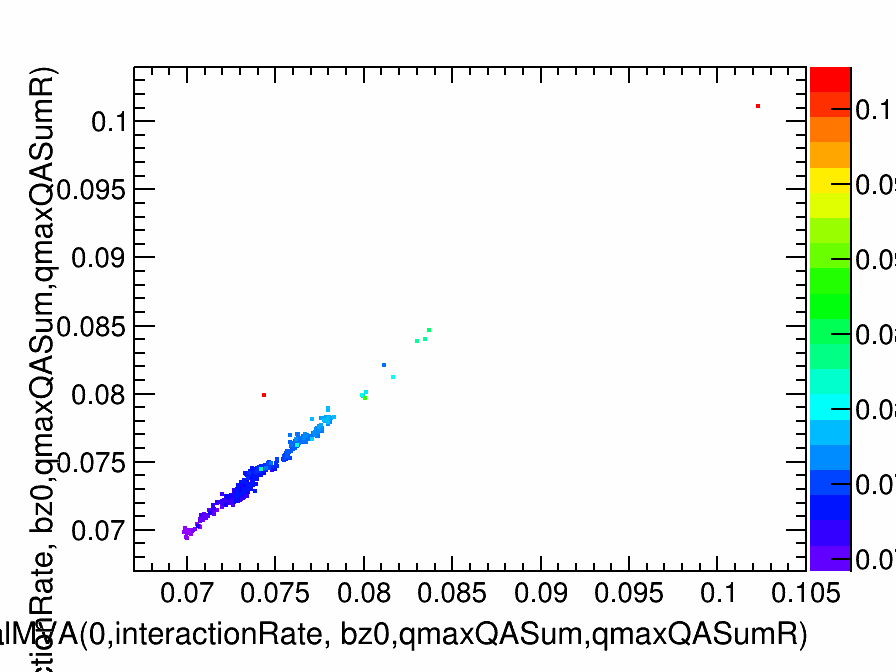

In [9]:
tree->Draw("AliNDFunctionInterface::EvalMVAStat(0,1,interactionRate, bz0,qmaxQASum,qmaxQASumR):AliNDFunctionInterface::EvalMVA(0,interactionRate, bz0,qmaxQASum,qmaxQASumR):resolutionMIP","run==QA.EVS.run","colz");
canvasDraw->Draw("colz");

### Regression value vs fit value 
* dEdx resolution

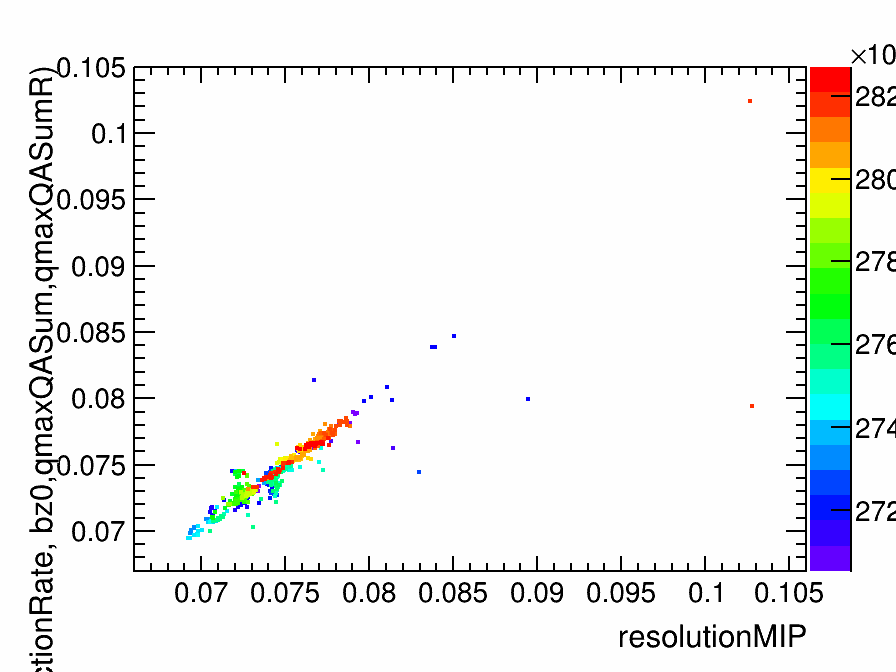

In [10]:
tree->Draw("AliNDFunctionInterface::EvalMVAStat(0,1,interactionRate, bz0,qmaxQASum,qmaxQASumR):resolutionMIP:run","run==QA.EVS.run","colz");
canvasDraw->Draw("colz");

### Confidence interval estimator comparison
* comparison of the method 0 (BDT 25/8) and 1 (BDT 12/6)

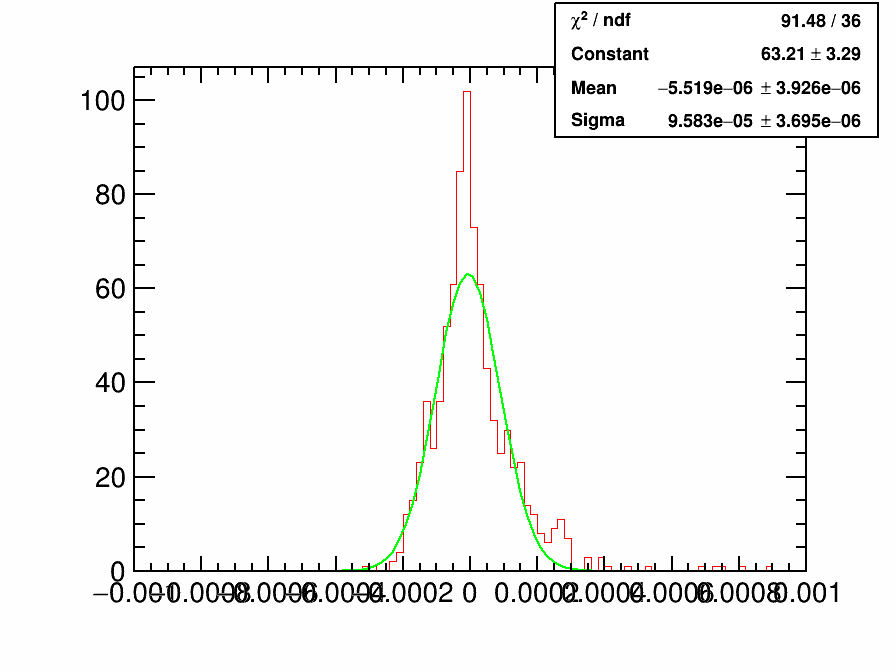

 FCN=91.4802 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=1.59774e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.32122e+01   3.28892e+00   1.08115e-02  -3.31802e-05
   2  Mean        -5.51887e-06   3.92615e-06   1.67265e-08  -1.48960e+02
   3  Sigma        9.58279e-05   3.69495e-06   3.48465e-05   3.12972e-02


In [11]:
gStyle->SetOptFit(1);
tree->Draw("AliNDFunctionInterface::EvalMVAStat(0,2,interactionRate, bz0,qmaxQASum,qmaxQASumR)-AliNDFunctionInterface::EvalMVAStat(1,2,interactionRate, bz0,qmaxQASum,qmaxQASumR)>>hisRMSD(100,-0.001,0.001)","run==QA.EVS.run","");
tree->GetHistogram()->Fit("gaus");
canvasDraw->Draw("colz");
